# Facial Keypoints Detection

In [3]:
# Import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

In [4]:
train_data = pd.read_csv('../facial-keypoints-detection/training.csv', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('../facial-keypoints-detection/test.csv', header=0, sep=',', quotechar='"')
IdLookupTable = pd.read_csv('../facial-keypoints-detection/IdLookupTable.csv',header=0, sep=',', quotechar='"')
SampleSubmission = pd.read_csv('../facial-keypoints-detection/SampleSubmission.csv',header=0, sep=',', quotechar='"')

In [3]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [31]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

## Which columns have missing values?

In [6]:
for i in train_data.columns:
    print(i,"has",sum(train_data[i].isna()),"missing values")
    print(i,"has",sum(train_data[i].isna())/(len(train_data[i]))*100," % of values are missing")
    
print(len(train_data.columns))

left_eye_center_x has 10 missing values
left_eye_center_x has 0.14186409419775856  % of values are missing
left_eye_center_y has 10 missing values
left_eye_center_y has 0.14186409419775856  % of values are missing
right_eye_center_x has 13 missing values
right_eye_center_x has 0.18442332245708612  % of values are missing
right_eye_center_y has 13 missing values
right_eye_center_y has 0.18442332245708612  % of values are missing
left_eye_inner_corner_x has 4778 missing values
left_eye_inner_corner_x has 67.78266420768904  % of values are missing
left_eye_inner_corner_y has 4778 missing values
left_eye_inner_corner_y has 67.78266420768904  % of values are missing
left_eye_outer_corner_x has 4782 missing values
left_eye_outer_corner_x has 67.83940984536814  % of values are missing
left_eye_outer_corner_y has 4782 missing values
left_eye_outer_corner_y has 67.83940984536814  % of values are missing
right_eye_inner_corner_x has 4781 missing values
right_eye_inner_corner_x has 67.82522343594

In [47]:
#Creating a nicely formatted table with percentage of values missing, average value, total number missing
train=train_data.drop(["Image"],axis=1)
total=train.shape[0]

nice_df=train.describe().T
nice_df=nice_df.drop(["std","25%","50%","75%"],axis=1)
nice_df["range"]=nice_df["max"]-nice_df["min"]
nice_df["mean"]
nice_df["percent_available"]=nice_df["count"]/total*100
nice_df=nice_df.drop(["max","min"],axis=1)
nice_df.round(2)

,count,mean,range,percent_available
left_eye_center_x,7039.0,66.36,71.93,99.86
left_eye_center_y,7039.0,37.65,78.89,99.86
right_eye_center_x,7036.0,30.31,84.35,99.82
right_eye_center_y,7036.0,37.98,77.18,99.82
left_eye_inner_corner_x,2271.0,59.16,65.38,32.22
left_eye_inner_corner_y,2271.0,37.94,39.37,32.22
left_eye_outer_corner_x,2267.0,73.33,67.69,32.16
left_eye_outer_corner_y,2267.0,37.71,38.37,32.16
right_eye_inner_corner_x,2268.0,36.65,64.96,32.17
right_eye_inner_corner_y,2268.0,37.99,43.56,32.17


All rows have an Image. Most rows have a:
* nose_tip (x, y)
* left_eye_center (x,y)
* right_eye_center (x,y)
* mouth_center_bottom_lip (x,y)

## How many rows have missing values?

In [50]:
missing_counts=[]
i=0
for i in range(train_data.shape[0]):
    row=train_data.iloc[i,:]
    missing_count=sum(row.isna())
    if missing_count !=0:
        #print("row",i,"has",missing_count,"missing values")
        missing_counts.append(missing_count)
print(len(missing_counts),"rows have at least one missing value")

4909 rows have at least one missing value


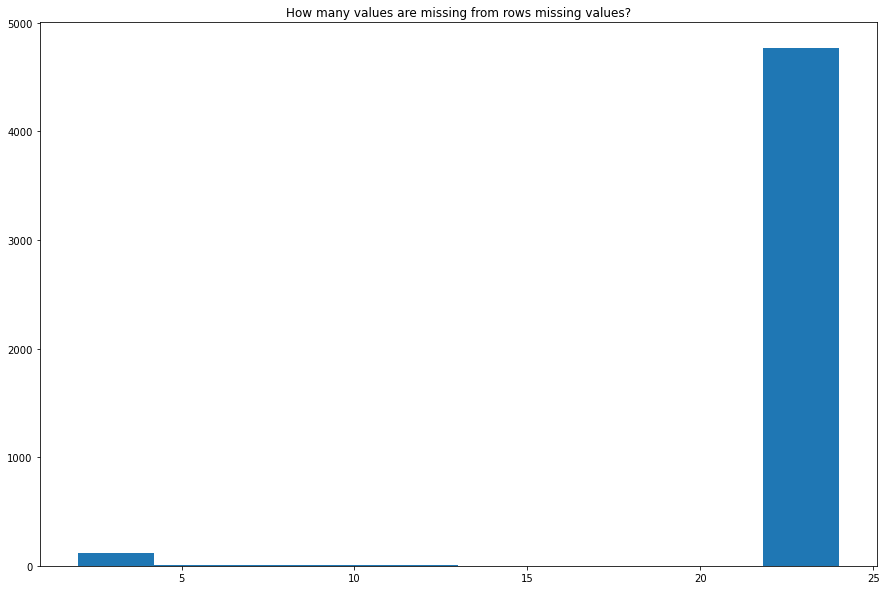

In [29]:
missing_array=np.array(missing_counts)
fig, ax = plt.subplots(figsize =(15, 10)) 
ax.hist(missing_array)
plt.title("How many values are missing from rows that are missing values?")
plt.show()

Most of the rows that are missing values are missing somewhere between 20-25 values.

In [27]:
pd.Series(missing_array).value_counts()

22    4755
2       87
4       28
24      10
6        9
8        8
12       5
10       3
14       2
20       2
dtype: int64

## What do the values we do have look like?

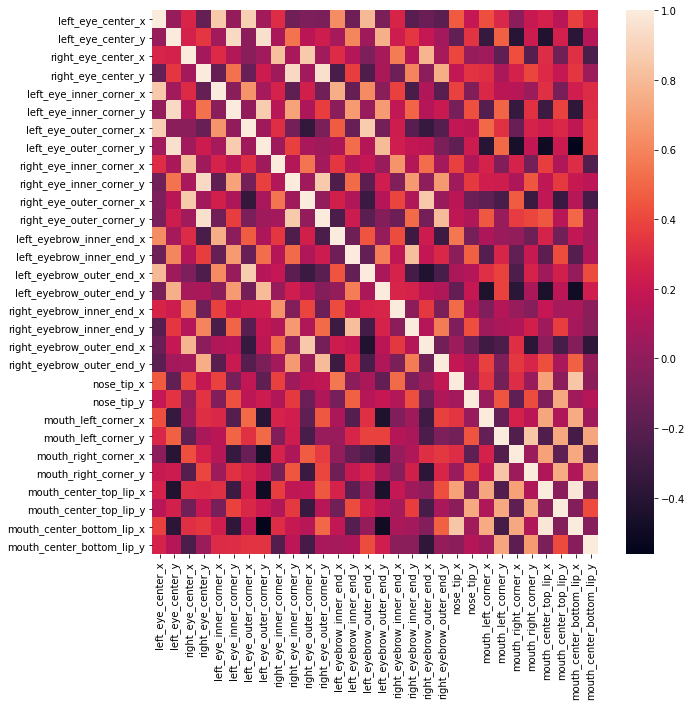

In [37]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(train_data.corr(),ax=ax)

It looks like the center values are pretty highly correlated with the outer/inner corner of eye and eyebrow. This could mean we might be able to make a reasonable guess at imputing a value for these missing columns if we have the center value.

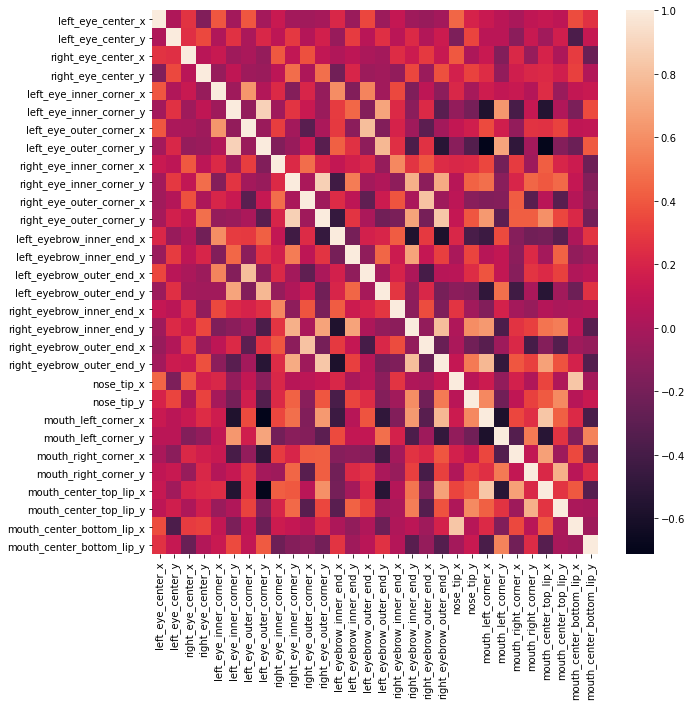

In [36]:
new_data=train_data.fillna(method='ffill')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(new_data.corr(),ax=ax)

Correlation decreased a lot using ffill to fill in nulls...

## Looking at the values we do have

In [12]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## Drawing some images

In [9]:
first_image=np.array(train_data['Image'][0].split(" "),dtype="int").reshape(96,96)

In [52]:
def fix_image(image_index):
    return np.array(train_data['Image'][image_index].split(" "),dtype="int").reshape(96,96)

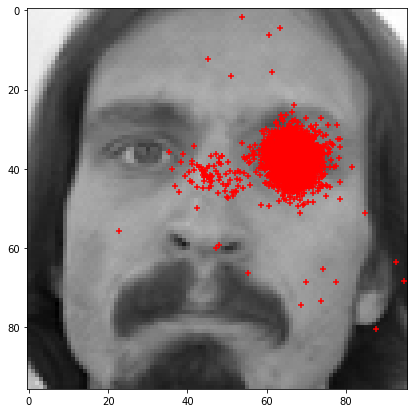

In [10]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.imshow(first_image, cmap = 'gray')

for i in range(len(train_data["left_eye_center_x"])):
    ax.scatter(train_data["left_eye_center_x"][i],train_data["left_eye_center_y"][i],color="red",marker="+")

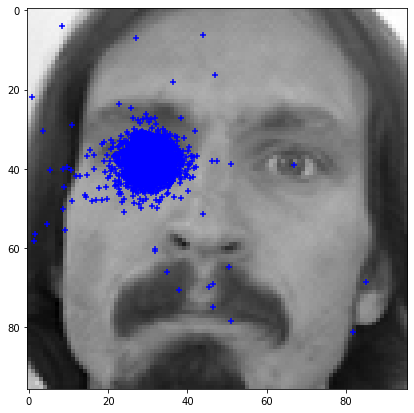

In [6]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.imshow(first_image.reshape(96,96), cmap = 'gray')

for i in range(len(train_data["right_eye_center_x"])):
    ax.scatter(train_data["right_eye_center_x"][i],train_data["right_eye_center_y"][i],color="blue",marker="+")

Most of the eye data is close to where this guy's eye is, that seems like a normal place to have an eye, but there's a fair number of points far away. We might consider eliminating some of the points that are below/above certain thresholds.

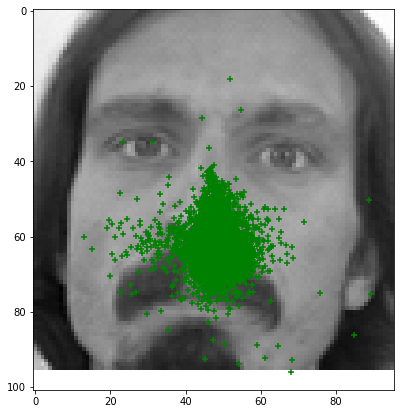

In [7]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.imshow(first_image.reshape(96,96), cmap = 'gray')

for i in range(len(train_data["nose_tip_x"])):
    ax.scatter(train_data["nose_tip_x"][i],train_data["nose_tip_y"][i],color="green",marker="+")

Generally the nose tip data appears around where this guy's nosetip is but there's a lot more variation. This could be due to the fact that we have a lot more data for nose tip than eye center.

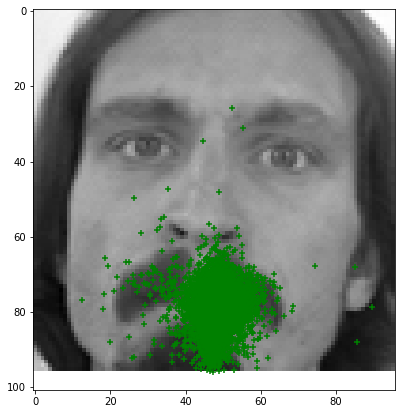

In [8]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.imshow(first_image.reshape(96,96), cmap = 'gray')

for i in range(len(train_data["mouth_center_bottom_lip_x"])):
    ax.scatter(train_data["mouth_center_bottom_lip_x"][i],train_data["mouth_center_bottom_lip_y"][i],color="purple",marker="+")

## Drawing some images with keypoints outside the norm

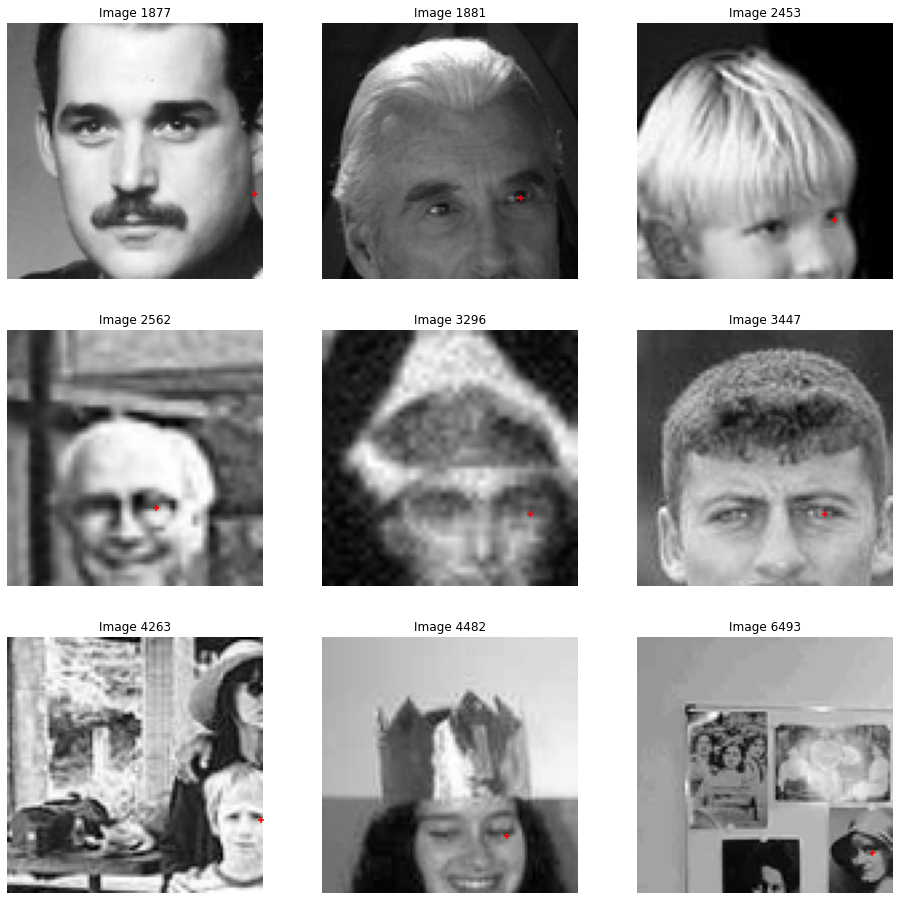

In [55]:
#These are images where the left eye was much lower than average
indices=np.where(train_data["left_eye_center_y"]>60)[0]
fig, axs = plt.subplots(3,3,figsize=(16,16)) 
index=1
axes=axs.flatten()
for i in indices:
    ax=axes[index-1]
    ax.axis('off')
    ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')
    ax.scatter(train_data["left_eye_center_x"][i],train_data["left_eye_center_y"][i],color="red",marker="+")
    ax.set_title("Image "+str(i))
    index+=1
plt.show()